In [1]:
import sys
import os

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk

In [3]:
os.getcwd()

'C:\\SPB_Data\\Artificial neural network\\gas sensor analysis'

In [4]:
data1 = pd.read_csv(r"C:\SPB_Data\Artificial neural network\data mining the water table\0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")

In [5]:
data2 = pd.read_csv(r"C:\SPB_Data\Artificial neural network\data mining the water table\702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")

In [6]:
data3 = pd.read_csv(r"C:\SPB_Data\Artificial neural network\data mining the water table\4910797b-ee55-40a7-8668-10efd5c1b960.csv")

In [7]:
data1.shape, data2.shape, data3.shape

((59400, 2), (14850, 40), (59400, 40))

In [8]:
data1.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [9]:
data2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [10]:
data3.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [11]:
check = data1['status_group']

In [12]:
check.unique()

array(['functional', 'non functional', 'functional needs repair'], dtype=object)

In [13]:
check.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [14]:
data2.keys() == data3.keys()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True], dtype=bool)

In [15]:
sample_classification = data1
test_sample = data2
train_sample = data3

In [16]:
train_sample.keys()

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

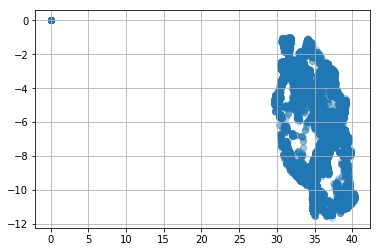

In [17]:
plt.scatter(train_sample['longitude'], train_sample['latitude'], alpha = 0.1)
plt.grid()
plt.show()
plt.savefig("longitude_Latitude_plot1", format = 'png', dpi = 300)

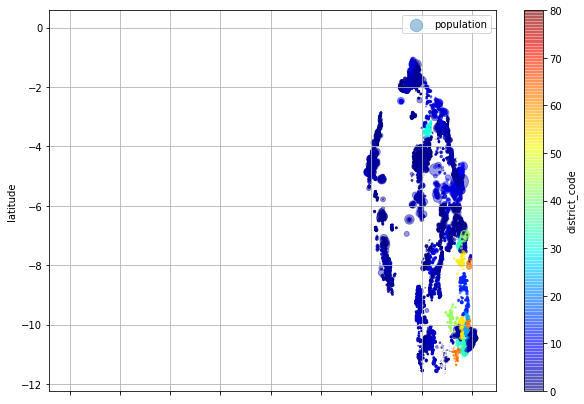

In [18]:
train_sample.plot(kind = 'scatter', x = 'longitude', y = 'latitude', s = train_sample['population']/100, label = 'population', c = 'district_code',
                  cmap = plt.get_cmap('jet'),colorbar = True, alpha = 0.4, figsize = (10,7))
plt.legend()
plt.grid()
plt.savefig('longitude_latitude_plot', format = 'png')
plt.show()

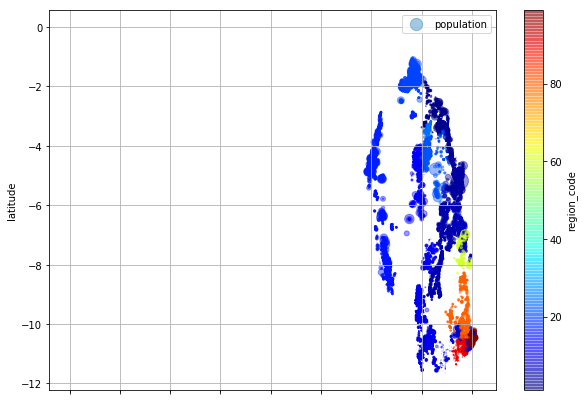

In [19]:
train_sample.plot(kind = 'scatter', x = 'longitude', y = 'latitude', s = train_sample['population']/100, label = 'population', c = 'region_code',
                  cmap = plt.get_cmap('jet'),colorbar = True, alpha = 0.4, figsize = (10,7))
plt.legend()
plt.grid()
plt.savefig('longitude_latitude_plot2', format = 'png')
plt.show()

In [20]:
null_samples = train_sample.isnull()
for key in train_sample.keys():
    null_sample = train_sample[key].isnull()
    count = np.sum(np.array([value for value in null_sample if value == True]))
    print (key,"      ", count, "        ", type(train_sample[key][1]))

id        0.0          <class 'numpy.int64'>
amount_tsh        0.0          <class 'numpy.float64'>
date_recorded        0.0          <class 'str'>
funder        3635          <class 'str'>
gps_height        0.0          <class 'numpy.int64'>
installer        3655          <class 'str'>
longitude        0.0          <class 'numpy.float64'>
latitude        0.0          <class 'numpy.float64'>
wpt_name        0.0          <class 'str'>
num_private        0.0          <class 'numpy.int64'>
basin        0.0          <class 'str'>
subvillage        371          <class 'str'>
region        0.0          <class 'str'>
region_code        0.0          <class 'numpy.int64'>
district_code        0.0          <class 'numpy.int64'>
lga        0.0          <class 'str'>
ward        0.0          <class 'str'>
population        0.0          <class 'numpy.int64'>
public_meeting        3334          <class 'float'>
recorded_by        0.0          <class 'str'>
scheme_management        3877          <clas

In [21]:
for key in train_sample.keys():
    train_sample[key] = train_sample[key].fillna(train_sample[key].mode)

In [22]:
null_samples = train_sample.isnull()
for key in train_sample.keys():
    null_sample = train_sample[key].isnull()
    count = np.sum(np.array([value for value in null_sample if value == True]))
    print (key, count)

id 0.0
amount_tsh 0.0
date_recorded 0.0
funder 0.0
gps_height 0.0
installer 0.0
longitude 0.0
latitude 0.0
wpt_name 0.0
num_private 0.0
basin 0.0
subvillage 0.0
region 0.0
region_code 0.0
district_code 0.0
lga 0.0
ward 0.0
population 0.0
public_meeting 0.0
recorded_by 0.0
scheme_management 0.0
scheme_name 0.0
permit 0.0
construction_year 0.0
extraction_type 0.0
extraction_type_group 0.0
extraction_type_class 0.0
management 0.0
management_group 0.0
payment 0.0
payment_type 0.0
water_quality 0.0
quality_group 0.0
quantity 0.0
quantity_group 0.0
source 0.0
source_type 0.0
source_class 0.0
waterpoint_type 0.0
waterpoint_type_group 0.0


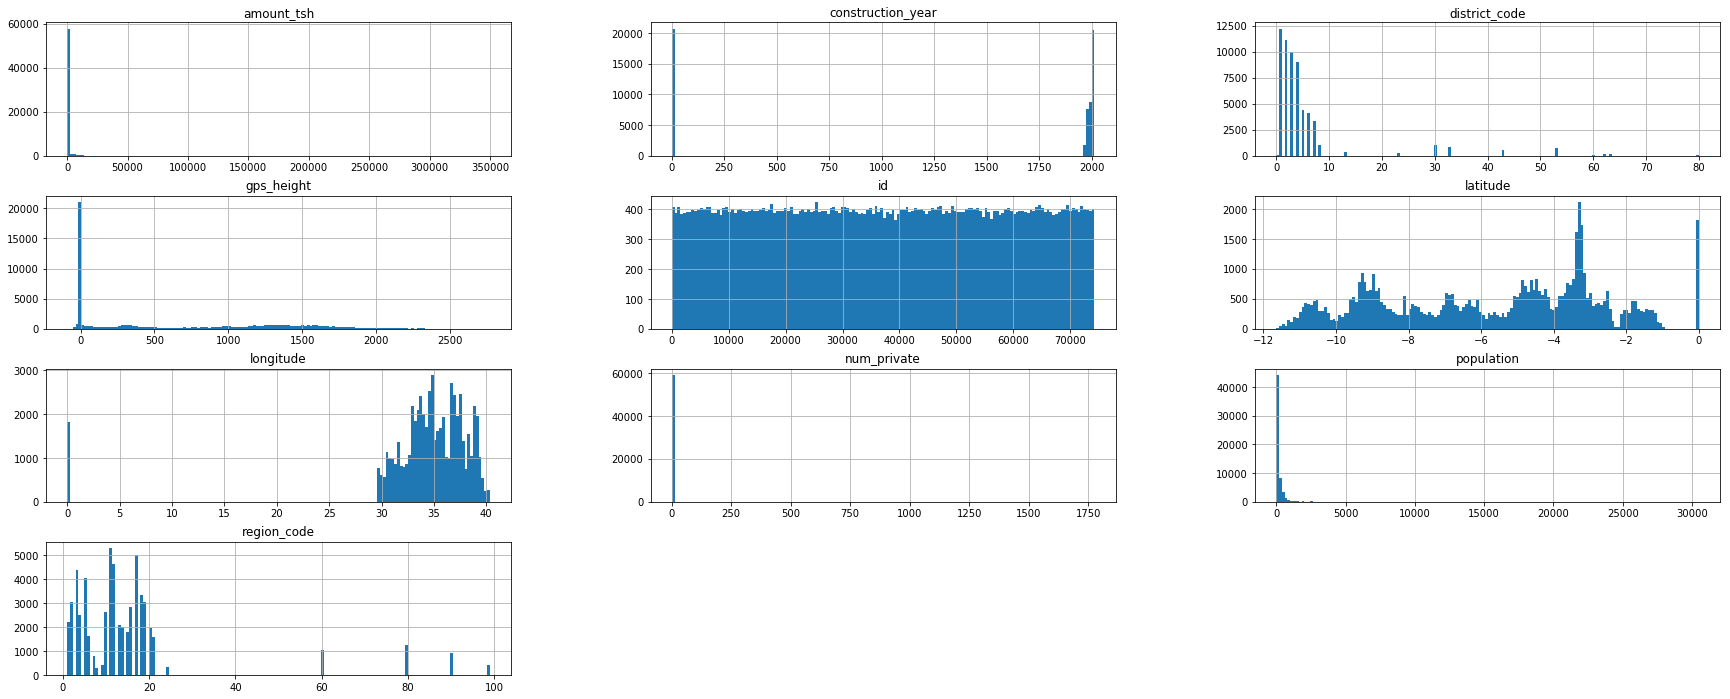

In [23]:
train_sample.hist(bins = 150, figsize = (30, 12))
plt.show()
plt.savefig("C:\SPB_Data\Artificial neural network\data mining the water table\hist results")

In [24]:
deal_keys = []
for _, key in enumerate(train_sample.keys()):
    if type(train_sample[key][1]) == str:
        deal_keys.append(key)
        
deal_keys = np.asarray(deal_keys)
print (deal_keys, type(deal_keys))

['date_recorded' 'funder' 'installer' 'wpt_name' 'basin' 'subvillage'
 'region' 'lga' 'ward' 'recorded_by' 'scheme_management' 'extraction_type'
 'extraction_type_group' 'extraction_type_class' 'management'
 'management_group' 'payment' 'payment_type' 'water_quality'
 'quality_group' 'quantity' 'quantity_group' 'source' 'source_type'
 'source_class' 'waterpoint_type' 'waterpoint_type_group'] <class 'numpy.ndarray'>


In [ ]:
dict_key, map_key, count  = {}, {}, 1
for key in train_sample.keys():
    if key not in ['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private','region_code', 
                   'distric_code', 'population' , 'public_meeting', 'scheme_name', 'construciton_year']:
        dict_key = train_sample[key].value_counts()
        for r in dict_key.keys():
            map_key[r] = count
            count +=1
        train_sample[key] = train_sample[key].map(map_key)
        
train_sample.head()